<h1><font color='blue'>YELP DATA WRANGLING</font></h1>

In [1]:
import numpy as np
import pandas as pd
import json
import credential_psql as creds
import pandas.io.sql as psql
import matplotlib.pyplot as plt
import seaborn as sns

<h3><font color='blue'>Load json Files into DataFrame</font></h3>
<p>In this section each of the 6 json files are placed into DataFrames and then exported to .csv files that will be used to load into a PostgreSQL database in order to more efficiently filter the data.</p>

In [2]:
def read_json_file(filename):
    '''Read json file in chunks and add to a list'''
    global data
    data = []
    for chunk in pd.read_json(filename, lines=True, chunksize=250000):
        if filename == 'business.json':
            chunk = chunk.drop('attributes', axis=1)
        if filename == 'review.json':
            chunk = chunk.drop('text', axis=1)
        data.append(chunk)

In [3]:
def convert_to_df(range_value, data_source):
    '''Convert the list from the json files into a pandas DataFrame'''
    global output_df 
    output_df = pd.DataFrame()
    for i in range(range_value):
        output_df = output_df.append(data_source[i])   

In [4]:
# read in json file, create business DataFrame and export to csv file
read_json_file('business.json')
business_data = data
convert_to_df(len(business_data), business_data)
business_data = output_df
#business_data.to_csv('business_filtered.csv', sep='|')

# read in json file, create checkin DataFrame and export to csv file
read_json_file('checkin.json')
checkin_data = data
convert_to_df(len(checkin_data), checkin_data)
checkin_data = output_df
#checkin_data.to_csv('checkin.csv', sep='|')

# read in json file, create photo DataFrame and export to csv file
read_json_file('photo.json')
photo_data = data
convert_to_df(len(photo_data), photo_data)
photo_data = output_df
#photo_data.to_csv('photo.csv', sep='|')

# read in json file, create review DataFrame and export to csv file
read_json_file('review.json')
review_data = data
convert_to_df(len(review_data), review_data)
review_data = output_df
#review_data.to_csv('review_filtered.csv', sep='|')

# read in json file, create tip DataFrame and export to csv file
read_json_file('tip.json')
tip_data = data
convert_to_df(len(tip_data), tip_data)
tip_data = output_df
#tip_data.to_csv('tip.csv', sep='|')

# read in json file, create user DataFrame and export to csv fiee
read_json_file('user.json')
user_data = data
convert_to_df(len(user_data), user_data)
user_data = output_df
#user_data.to_csv('user.csv', sep='|')

In [5]:
# Number of records into each json data file.
print("{:,}".format(len(business_data)), 'records in business.json file')
print("{:,}".format(len(checkin_data)), 'records in checkin.json file')
print("{:,}".format(len(photo_data)), 'records in photo.json file')
print("{:,}".format(len(review_data)), 'records in review.json file')
print("{:,}".format(len(tip_data)), 'records in tip.json file')
print("{:,}".format(len(user_data)), 'records in user.json file')

192,609 records in business.json file
161,950 records in checkin.json file
200,000 records in photo.json file
6,685,900 records in review.json file
1,223,094 records in tip.json file
1,637,138 records in user.json file


<h3><font color='blue'>Explore Business Data</font></h3>
<p>Basic exploration of the data in the business.json file.</p>

In [6]:
business_data.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."


36 unique states in dataset


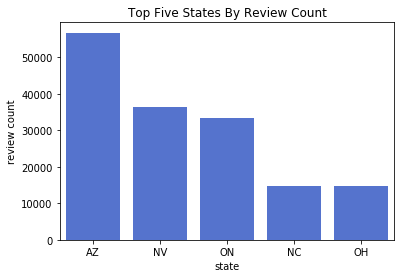

In [7]:
# Find top 10 states with Yelp reviews in this data set
print(business_data['state'].nunique(), 'unique states in dataset')
subset = pd.DataFrame(business_data['state'].value_counts().head(5))
_ = sns.barplot(x=subset.index, y='state', data=subset, color='royalblue')
_ = plt.xlabel('state')
_ = plt.ylabel('review count')
_ = plt.title('Top Five States By Review Count')

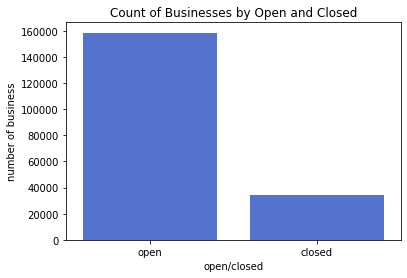

In [8]:
# Identify the number of business that have been identified as closed.
subset = pd.DataFrame(business_data['is_open'].value_counts())
xvalue = ['open', 'closed']
_ = sns.barplot(x=xvalue, y='is_open', data=subset, color='royalblue')
_ = plt.xlabel('open/closed')
_ = plt.ylabel('number of business')
_ = plt.title('Count of Businesses by Open and Closed')

In [9]:
def find_categories(categories):
    '''Determine the amount of unique categories in DataFrame'''
    all_categories = list(categories)
    category_list = []
    for i in range(len(all_categories)):
        if all_categories[i] is not None:
            category = all_categories[i].split(', ')
            for j in range(1):
                category_list.append(category[j])
    category_list = list(set(category_list))
    print(len(category_list), 'categories')
    print(category_list)
    return category_list

In [10]:
# Determine unique number of categories
category_list = find_categories(business_data['categories'])

1177 categories
['Wedding Chapels', 'Arts & Crafts', 'Pizza', 'Dry Cleaning', 'Tapas/Small Plates', 'Bakeries', 'Lounges', 'Spin Classes', 'Walk-in Clinics', 'Business Financing', 'Honey', 'Macarons', 'Dance Clubs', 'Brazilian', 'New Mexican Cuisine', 'Indonesian', 'Fruits & Veggies', 'Acupuncture', 'Laotian', 'Saunas', 'Scandinavian', 'Leather Goods', 'Preventive Medicine', 'Guitar Stores', 'Foundation Repair', 'Language Schools', 'Television Stations', 'Orthodontists', 'Bike Shop', 'Tours', 'Airport Terminals', 'Home Inspectors', 'Title Loans', 'Dermatologists', 'College Counseling', 'Handyman', 'Professional Sports Teams', 'Hospice', 'Professional Services', 'Art Classes', 'International Grocery', 'Public Markets', 'Infectious Disease Specialists', 'Gift Shops', 'Wallpapering', 'Musical Instrument Services', 'Tapas Bars', 'Jewelry', 'Junk Removal & Hauling', 'Szechuan', 'Party Bike Rentals', 'IT Services & Computer Repair', 'Estheticians', 'Delicatessen', 'Metal Fabricators', 'Publi

<h3><font color='blue'>Explore Checkin Data</font></h3>
<p>Basic exploration of the data in the checkin.json file.</p>

In [11]:
checkin_data.head(2)

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."


<h3><font color='blue'>Explore Photo Data</font></h3>
<p>Basic exploration of the data in the photo.json file.</p>

In [12]:
photo_data.head(2)

,caption,photo_id,business_id,label
0,,MllA1nNpcp1kDteVg6OGUw,rcaPajgKOJC2vo_l3xa42A,inside
1,,YjxBE88Bf6CmTEF2LP1UNA,Kn23LDd740SBVJ7mum0fwg,inside


<h3><font color='blue'>Explore Review Data<font></h3>
<p>Basic exploration of the data in the review.json file.</p>

In [13]:
review_data.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,2017-01-14 21:30:33


<h3><font color='blue'>Explore Tip Data</font></h3>
<p>Basic exploration of the data in the tip.json file.</p>

In [14]:
tip_data.head(2)

,user_id,business_id,text,date,compliment_count
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0


<h3><font color='blue'>Explore User Data</font></h3>
<p>Basic exploration of the data in the user.json file.</p>

In [15]:
user_data.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
# Descriptive statistics on number of review counts by users
user_data['review_count'].describe()

count    1.637138e+06
mean     2.228770e+01
std      7.692236e+01
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.500000e+01
max      1.327800e+04
Name: review_count, dtype: float64

<h3><font color='blue'>Insights from Initial Exploration</font></h3>
<ul>
<li>Half of the data files (business.json, review.json, and user.json) contain information that would be pertinent in creating a recommendation system that looks to recommend restaurants based on users star ratings and similar users.
<li>The recommendation system will focus only on restaurants and the categories column in the business_data DataFrame will need to be filtered for 'Restaurants' as a keyword.
<li>The small portion of the restaurants that are closed, need to be removed from business_data.
<li>There are 36 unique states represented in the dataset with the top 5 states by review count being Arizona, Nevada, Ontario, North Carolina, and Ohio.
<li>The review_data DataFrame has a 'business_id' column that can be joined on the 'business_id' column in the business_data DataFrame in order to eliminate any reviews from business other than restaurants.
</ul>